In [1]:
#Procedemos a Importar las librerias que son necesarias para la realizacion del CVS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

In [2]:
#Seguimos al Cargue de el dataset y mostramos las 5 primeras filas
datos = pd.read_csv("winequality-red.csv")
datos.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
datos.shape

(1599, 12)

In [4]:
datos.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
# procedemos a verificar si hay algunos datos nulos
datos.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

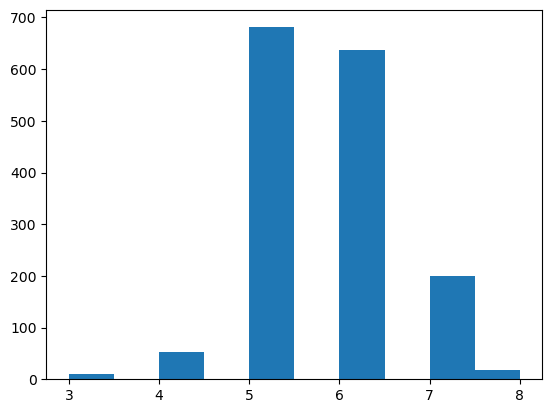

In [6]:
plt.hist(datos.quality)

In [28]:
# Cómo podemos visualizar en la grafica correspondiente, hayamos un mayor aumento en la Calidad Numero 5

<Axes: xlabel='fixed acidity', ylabel='alcohol'>

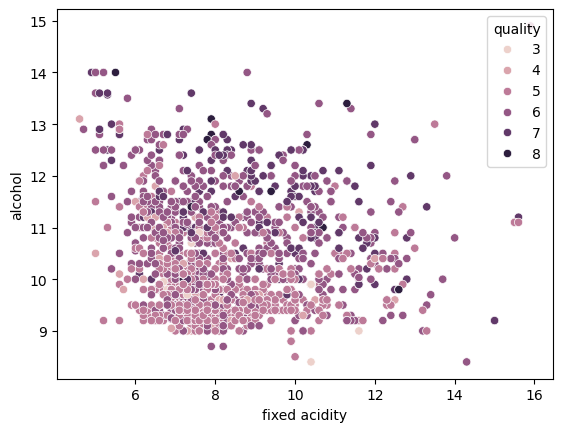

In [7]:
# Agregamos un  diagrama de dispersión
sns.scatterplot(x="fixed acidity", y="alcohol", hue="quality", data=datos)

In [27]:
#El gráfico de dispersión revela una correlación positiva pero débil entre la acidez fija y el nivel de alcohol en el vino. Esto indica que, en general, a medida que la acidez fija aumenta, también tiende a aumentar el contenido de alcohol. No obstante, la relación es tenue, ya que los puntos en el gráfico están bastante dispersos. Esta dispersión sugiere que hay muchos vinos con alta acidez fija que presentan bajos niveles de alcohol, y también ocurre lo contrario: vinos con baja acidez fija pueden tener un contenido de alcohol elevado.

In [8]:
predictors_col = ["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", 
                  "density", "pH", "sulphates", "alcohol"] # Vemos los nombres de las características de entrada para el modelo de aprendizaje
target_col = ['quality'] # Agregamos el nombre de la variable la cual  se desea predecir

In [9]:
# Preparamos el conjunto de datos que seran utilizados para el modelo de aprendizaje
predictors = datos[predictors_col]
target = datos[target_col]

In [10]:
# Con la siguiente variable llamada predictors, se obtendra los datos relevantes para el análisis correspondiente
predictors

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [11]:
target

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


In [12]:
# Con lo siguiente, hayaremos la correlación entre las variables predictoras
corr = predictors.corr()
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595


In [26]:
#La matriz de correlación proporciona información clave sobre cómo se relacionan entre sí los parámetros de calidad del vino. El coeficiente de correlación, que puede variar entre -1 y 1, nos indica la naturaleza y la fuerza de las relaciones entre las variables. Un valor de 1 sugiere una correlación positiva perfecta, es decir, que las variables aumentan o disminuyen al mismo tiempo. Un valor de -1 indica una correlación negativa perfecta, donde una variable aumenta mientras la otra disminuye. Un valor cercano a 0 sugiere que no hay relación entre las variables.

#Basándonos en la matriz de correlación, podemos hacer las siguientes observaciones sobre los parámetros:

#Acidez fija: Esta variable muestra una correlación positiva con el ácido cítrico y los sulfatos, lo que sugiere que los vinos con mayor acidez fija también tienden a contener mayores cantidades de estos compuestos.

#Acidez volátil: En este caso, existe una correlación negativa con el azúcar residual, lo que implica que a mayor acidez volátil, menor será la cantidad de azúcar residual en el vino.

#Ácido cítrico: El ácido cítrico está positivamente correlacionado con tanto el azúcar residual como los sulfatos, lo que sugiere que los vinos con niveles elevados de ácido cítrico también tienden a tener más azúcar y sulfato.

#Azúcar residual: Se observa una correlación positiva con el contenido de alcohol, lo que significa que los vinos más dulces tienden a tener mayores niveles de alcohol.

#Cloruros: Los niveles de cloruro están correlacionados positivamente con el dióxido de azufre total, lo que implica que los vinos con mayores concentraciones de cloruros también presentan niveles más altos de este compuesto.

#Dióxido de azufre libre: Muestra una relación negativa con el pH, lo que sugiere que a mayor dióxido de azufre libre, más bajo será el pH del vino.

#Dióxido de azufre total: Esta variable está correlacionada positivamente con la densidad y el pH. Esto indica que los vinos con mayor dióxido de azufre total suelen tener mayor densidad y un pH más elevado.

#Densidad: Hay una correlación positiva entre la densidad y tanto el pH como los sulfatos, lo que sugiere que los vinos con mayor densidad también tienden a tener más sulfatos y un pH más elevado.

#pH: El pH del vino muestra una relación positiva con los sulfatos, lo que implica que los vinos más básicos también tienden a tener niveles más altos de sulfatos.

#Sulfatos: Los niveles de sulfatos están correlacionados positivamente con el contenido de alcohol, lo que sugiere que los vinos con mayor contenido de alcohol tienden a contener más sulfatos.

#Alcohol: Por último, el alcohol presenta una correlación negativa con la acidez volátil, lo que indica que los vinos con mayor contenido alcohólico tienden a ser menos volátiles en términos de acidez.

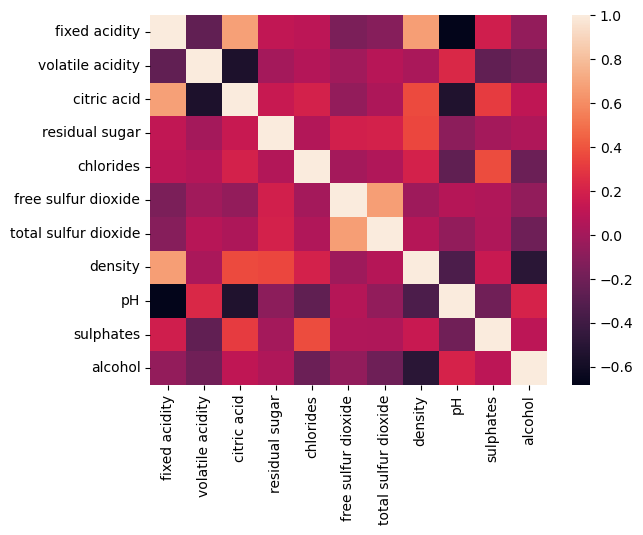

In [13]:
sns.heatmap(corr)
plt.show()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.25, random_state=13)

In [25]:
#La función train_test_split se emplea para separar los datos en dos conjuntos: uno para entrenamiento y otro para pruebas. En este caso, se divide tanto el conjunto de predictores como el de objetivos (target) en un conjunto de entrenamiento y un conjunto de prueba. El 25% de los datos se reserva para el conjunto de prueba, lo que significa que el modelo se entrenará con el 75% restante. Además, se utiliza un valor de random_state de 13, lo que asegura que la división de los datos sea consistente y reproducible en ejecuciones futuras.

In [15]:
# Con esta, establecemos lo siguiente para crear el arbol de desición
tree = DecisionTreeClassifier()

In [16]:
# Procedemo a entrenar el arbol de decisiones.
arbol = tree.fit(X_train, y_train)

[Text(0.48473837761271116, 0.9791666666666666, 'x[10] <= 10.525\ngini = 0.644\nsamples = 1199\nvalue = [8.0, 42.0, 500.0, 487.0, 150.0, 12.0]'),
 Text(0.2383429601105845, 0.9375, 'x[9] <= 0.535\ngini = 0.542\nsamples = 725\nvalue = [5.0, 27.0, 423.0, 246.0, 24.0, 0.0]'),
 Text(0.040588163810912625, 0.8958333333333334, 'x[1] <= 0.335\ngini = 0.369\nsamples = 173\nvalue = [2, 13, 135, 22, 1, 0]'),
 Text(0.021387774942277313, 0.8541666666666666, 'x[2] <= 0.43\ngini = 0.54\nsamples = 10\nvalue = [0, 1, 3, 6, 0, 0]'),
 Text(0.017499088589135983, 0.8125, 'x[9] <= 0.485\ngini = 0.56\nsamples = 5\nvalue = [0, 1, 3, 1, 0, 0]'),
 Text(0.013610402235994653, 0.7708333333333334, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3, 0, 0, 0]'),
 Text(0.021387774942277313, 0.7708333333333334, 'x[7] <= 0.996\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 0, 1, 0, 0]'),
 Text(0.017499088589135983, 0.7291666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0, 0, 0]'),
 Text(0.02527646129541864, 0.7291666666666666,

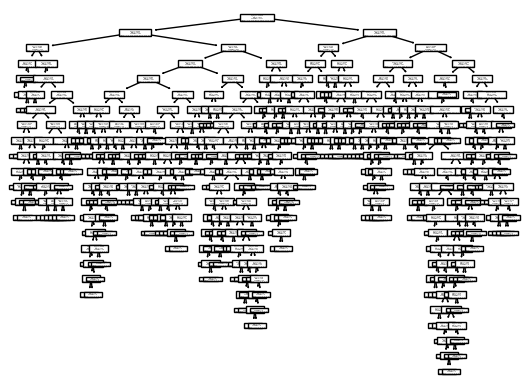

In [17]:
# Lo siguiente que se pretende observar es el arbol de desición
plot_tree(arbol)

In [18]:
# Hacemos prediciones 
predicciones = arbol.predict(X_test)

In [19]:
predicciones

array([7, 5, 5, 5, 6, 5, 6, 7, 5, 5, 5, 6, 5, 6, 7, 7, 6, 7, 5, 7, 5, 6,
       7, 5, 6, 7, 5, 5, 5, 7, 7, 5, 5, 6, 5, 6, 5, 6, 6, 7, 5, 6, 6, 6,
       5, 5, 6, 6, 6, 6, 5, 5, 6, 5, 7, 5, 5, 6, 6, 5, 5, 7, 5, 5, 6, 7,
       6, 7, 5, 5, 6, 5, 7, 6, 5, 5, 5, 5, 5, 5, 6, 6, 6, 5, 6, 5, 7, 6,
       6, 6, 6, 6, 7, 7, 5, 6, 6, 6, 6, 5, 7, 6, 5, 5, 7, 5, 6, 6, 5, 7,
       7, 8, 6, 6, 5, 6, 6, 7, 4, 7, 7, 5, 5, 6, 5, 5, 5, 5, 6, 7, 6, 5,
       5, 7, 5, 5, 7, 5, 6, 7, 5, 5, 5, 6, 7, 4, 6, 5, 6, 5, 5, 6, 5, 5,
       5, 5, 6, 6, 6, 6, 6, 7, 6, 5, 6, 6, 6, 5, 6, 6, 5, 5, 5, 5, 6, 5,
       5, 5, 5, 5, 5, 6, 6, 5, 5, 6, 6, 6, 5, 5, 5, 5, 5, 5, 6, 5, 6, 7,
       5, 5, 6, 6, 5, 6, 7, 6, 6, 5, 5, 5, 6, 5, 5, 6, 7, 5, 6, 7, 5, 7,
       5, 5, 7, 6, 5, 6, 5, 5, 6, 7, 6, 6, 6, 5, 5, 6, 6, 5, 6, 5, 6, 6,
       5, 5, 5, 6, 8, 5, 5, 6, 6, 5, 5, 5, 6, 6, 6, 7, 6, 7, 4, 6, 7, 5,
       6, 5, 6, 7, 6, 5, 7, 5, 5, 5, 6, 6, 6, 6, 5, 5, 5, 6, 5, 5, 7, 4,
       6, 7, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 7,

In [20]:
# Procedemos a examinar la matriz de confusion
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['Predicciones'])

Predicciones,3,4,5,6,7,8
Actual,,,,,,
3,0,0,2,0,0,0
4,1,2,7,1,0,0
5,0,1,122,47,11,0
6,0,2,41,83,22,3
7,0,0,4,20,24,1
8,0,0,1,3,2,0


In [21]:
accuracy = accuracy_score(y_test,predicciones)
accuracy

0.5775

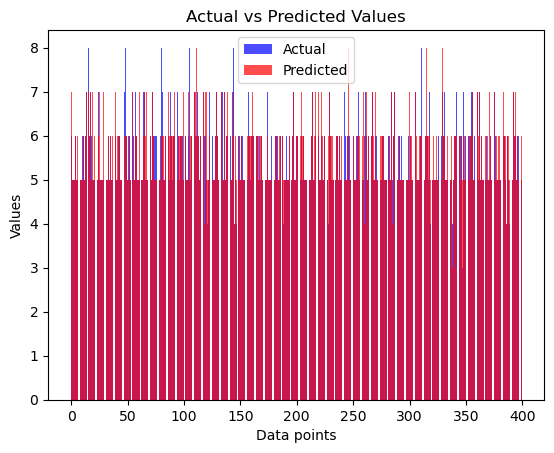

In [24]:
# Lo siguiente seria crear una lista de valores reales
actual = [y[0] for y in y_test.values.tolist()]

# Procedemos a crear una lista de valores predichos
predicted = predicciones

# Un Diagrama barra
plt.bar(range(len(actual)), actual, color='blue', alpha=0.7, align='center', label='Actual')
plt.bar(range(len(actual)), predicted, color='red', alpha=0.7, align='center', label='Predicted')

# Añadimos la equitetas y los titulos
plt.xlabel('Data points')
plt.ylabel('Values')
plt.title('Actual vs Predicted Values')
plt.legend()

# Show the plot
plt.show()


#Interpretación de la matriz de confusión:

#La matriz de confusión nos permite evaluar el desempeño del modelo de aprendizaje automático en la tarea de clasificar la calidad del vino, que está representada en una escala de 1 a 8, donde 1 indica la calidad más baja y 8 la más alta.

#Al observar la matriz, podemos identificar cuántas veces el modelo acertó al predecir correctamente la calidad del vino en cada categoría, así como los errores cometidos al clasificar incorrectamente los vinos en otras categorías. En general, el modelo demuestra un buen rendimiento, pero su capacidad para predecir correctamente varía según la categoría de calidad. Por ejemplo, el modelo muestra alta precisión en la clasificación de vinos de calidad 3 y 7, mientras que tiene dificultades para clasificar adecuadamente los vinos con calidades 4 y 8.

#Interpretación del gráfico de barras:

#El gráfico de barras ilustra cómo se distribuyen las predicciones del modelo para las distintas categorías de calidad del vino. El eje horizontal (X) muestra las calidades predichas, desde 0 hasta 8, mientras que el eje vertical (Y) refleja el número de vinos predichos en cada categoría.

#El gráfico destaca que el modelo realiza la mayoría de sus predicciones en las calidades medias, específicamente en los niveles 5, 6 y 7. Esto sugiere que el modelo tiene una tendencia a predecir la calidad media de los vinos, mientras que hace menos predicciones para vinos de calidad extremadamente baja o alta (0, 1, 2, 3 y 8).

#Comparación entre la matriz de confusión y el gráfico de barras:

#Los resultados observados en el gráfico de barras coinciden con los hallazgos de la matriz de confusión. La matriz mostró una alta precisión del modelo para las categorías de calidad 5, 6 y 7, lo que se refleja en la concentración de predicciones en estas calidades en el gráfico. Al mismo tiempo, las calidades de vino muy bajas o muy altas tienen menos predicciones, lo que también es consistente con los errores observados en la matriz de confusión, donde el modelo tiene menos precisión para estas categorías.

#Este enfoque destaca los patrones de desempeño del modelo de manera clara, analizando tanto la matriz de confusión como el gráfico de barras y resaltando sus relaciones.
